In [ ]:
"""
Steps to be carried out in Exploratory Data Analysis
a) Understand the data(description)
b) Clean the data
c) Analysis of relationship between variables(using plots)
"""

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("/home/ashleymuoki/Downloads/thegef_data(with_dates).csv")

In [4]:
# understanding the data

In [5]:
data.head()

,Title,Funding Institution,Implementing Institution,Country,Region,Status,Total Project Amount,Link to Project Documentation,Start Date,End Date
0,Preparation of Belize’s First Biennial Transpa...,['GEF Trust Fund'],['United Nations Environment Programme'],['Belize'],['Latin America and Caribbean'],Project Approved,1233000,['https://publicpartnershipdata.azureedge.net/...,31 Aug 2023,NaN
1,Development of the Fourth National Communicati...,['GEF Trust Fund'],['United Nations Development Programme'],['Botswana'],['Africa'],Project Approved,1233000,['https://publicpartnershipdata.azureedge.net/...,14 Sep 2023,NaN
2,Elaboration of Combined Third National Communi...,['GEF Trust Fund'],['Food and Agriculture Organization'],['Venezuela'],['Latin America and Caribbean'],Project Approved,632190,['https://publicpartnershipdata.azureedge.net/...,27 Sep 2023,NaN
3,Tunisian First Biennial Transparency Report (B...,['GEF Trust Fund'],['United Nations Development Programme'],['Tunisia'],['Africa'],Project Approved,1233000,['https://publicpartnershipdata.azureedge.net/...,14 Sep 2023,NaN
4,Development of the First Biennial Transparency...,['GEF Trust Fund'],['United Nations Development Programme'],['Armenia'],['Europe and Central Asia'],Project Approved,1233000,['https://publicpartnershipdata.azureedge.net/...,31 Aug 2023,NaN


In [6]:
data.tail()

,Title,Funding Institution,Implementing Institution,Country,Region,Status,Total Project Amount,Link to Project Documentation,Start Date,End Date
2129,Szombathely CHP/Biomass Project,['GEF Trust Fund'],['The World Bank'],['Hungary'],['Europe and Central Asia'],Cancelled,28000000,['https://publicpartnershipdata.azureedge.net/...,NaN,05 Feb 2008
2130,Hydrogen Fuel Cell Buses for Urban Transport,['GEF Trust Fund'],['United Nations Development Programme'],['Brazil'],['Latin America and Caribbean'],Completed,21443000,['https://publicpartnershipdata.azureedge.net/...,20 Dec 2000,07 Dec 2018
2131,Biomass Energy for Rural India,['GEF Trust Fund'],['United Nations Development Programme'],['India'],['Asia'],Completed,8623000,['https://publicpartnershipdata.azureedge.net/...,21 Feb 2001,17 Feb 2015
2132,Second Beijing Environment Project,['GEF Trust Fund'],['The World Bank'],['China'],['Asia'],Completed,1255000000,['https://publicpartnershipdata.azureedge.net/...,31 May 2000,28 Jul 2011
2133,Capacity Building for the Adoption and Applica...,['GEF Trust Fund'],['United Nations Development Programme'],['Regional'],['Regional'],Completed,1249000,['https://publicpartnershipdata.azureedge.net/...,24 Jan 2001,12 Dec 2011


In [7]:
data.shape

(2134, 10)

In [8]:
data.describe()

,Total Project Amount
count,2.134000e+03
mean,4.555798e+07
std,1.337879e+08
min,4.800000e+04
25%,2.465625e+06
50%,1.445869e+07
75%,3.797324e+07
max,3.040516e+09


In [9]:
#check the columns
data.columns

Index(['Title', 'Funding Institution', 'Implementing Institution', 'Country',
       'Region', 'Status', 'Total Project Amount',
       'Link to Project Documentation', 'Start Date', 'End Date'],
      dtype='object')

In [10]:
#check for unique values
data.nunique()

Title                            2001
Funding Institution                 5
Implementing Institution           65
Country                           162
Region                              7
Status                              5
Total Project Amount             1893
Link to Project Documentation    2133
Start Date                       1328
End Date                          826
dtype: int64

In [11]:
#check for a column
data['Funding Institution'].unique()

array(["['GEF Trust Fund']", "['Multi Trust Fund']",
       "['Least Developed Countries Fund']",
       "['Special Climate Change Fund']", "['CBIT Trust Fund']"],
      dtype=object)

In [12]:
#cleaning the data
#check for null values
data.isnull().sum()

Title                               0
Funding Institution                 0
Implementing Institution            0
Country                             0
Region                              0
Status                              0
Total Project Amount                0
Link to Project Documentation       0
Start Date                        149
End Date                         1056
dtype: int64

In [15]:
project = data.drop(['Start Date', 'End Date','Link to Project Documentation'], axis=1)

In [16]:
project.head()

,Title,Funding Institution,Implementing Institution,Country,Region,Status,Total Project Amount
0,Preparation of Belize’s First Biennial Transpa...,['GEF Trust Fund'],['United Nations Environment Programme'],['Belize'],['Latin America and Caribbean'],Project Approved,1233000
1,Development of the Fourth National Communicati...,['GEF Trust Fund'],['United Nations Development Programme'],['Botswana'],['Africa'],Project Approved,1233000
2,Elaboration of Combined Third National Communi...,['GEF Trust Fund'],['Food and Agriculture Organization'],['Venezuela'],['Latin America and Caribbean'],Project Approved,632190
3,Tunisian First Biennial Transparency Report (B...,['GEF Trust Fund'],['United Nations Development Programme'],['Tunisia'],['Africa'],Project Approved,1233000
4,Development of the First Biennial Transparency...,['GEF Trust Fund'],['United Nations Development Programme'],['Armenia'],['Europe and Central Asia'],Project Approved,1233000


In [17]:
#relationship analysis
#1 correlation matrix
correlation = project.corr()

/tmp/ipykernel_4531/4143060219.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = project.corr()


<Axes: >

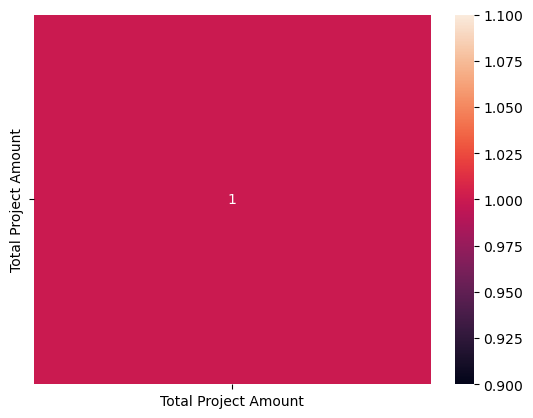

In [18]:
sns.heatmap(correlation, xticklabels= correlation.columns,yticklabels=correlation.columns,annot=True)

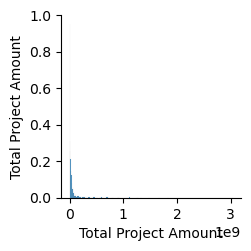

In [19]:
#use pairplot
sns.pairplot(project)

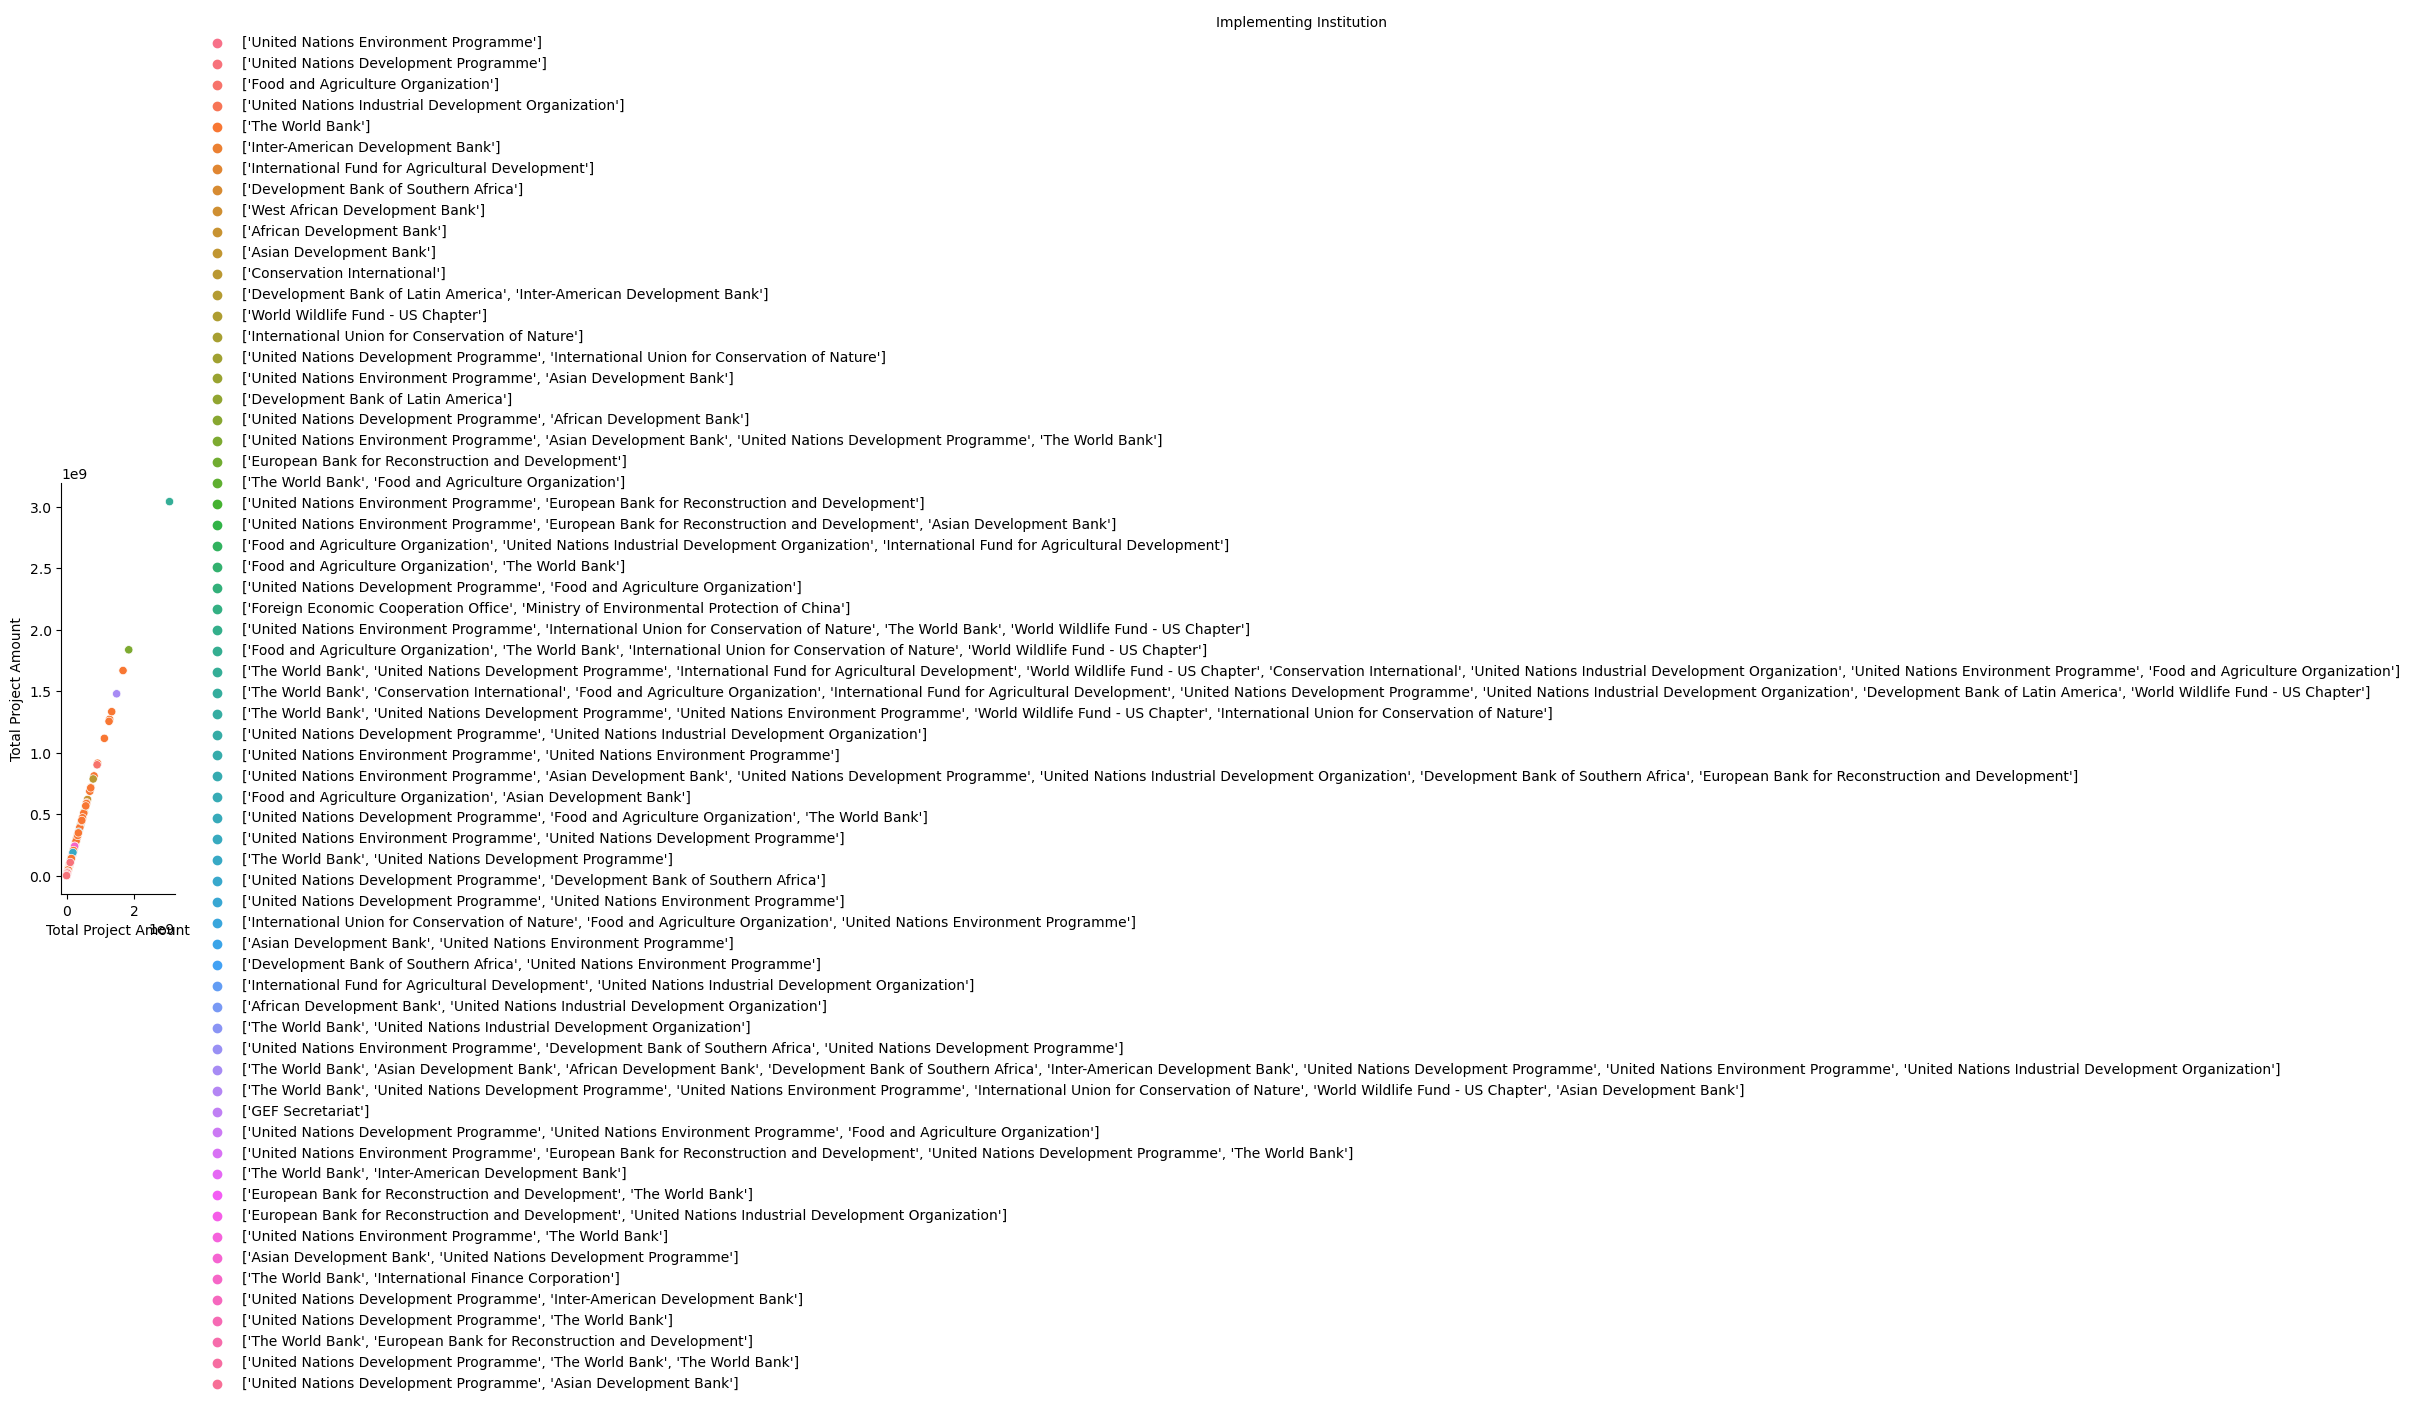

In [34]:
#scatter plot
sns.relplot(x='Total Project Amount',y = 'Total Project Amount', hue= 'Implementing Institution',data = project)

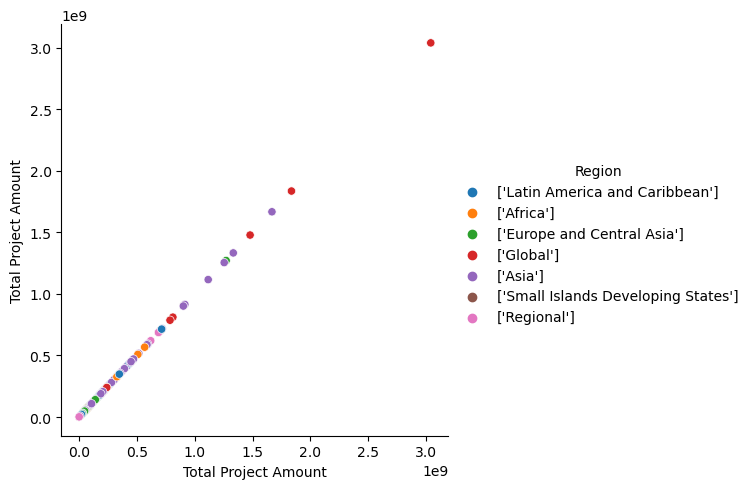

In [35]:
#scatter plot 2
sns.relplot(x='Total Project Amount',y = 'Total Project Amount', hue= 'Region',data = project)

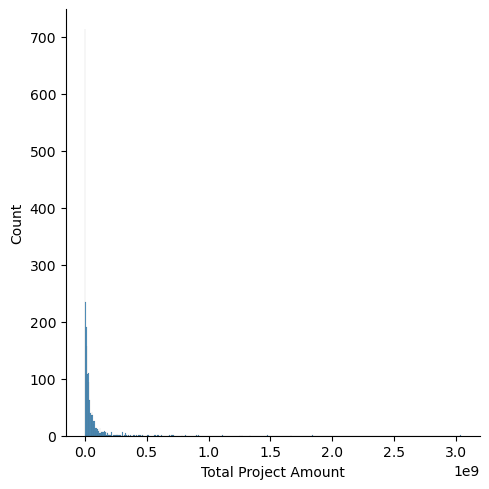

In [26]:
#histogram
sns.displot(project['Total Project Amount'])

([<matplotlib.patches.Wedge at 0x7f47ac1b7510>,
  ...],
 [Text(1.3199999989522637, 5.2593000867103565e-05, "['Latin America and Caribbean']"),
  Text(1.3199999905703736, 0.00015777900226734954, "['Africa']"),
  Text(1.3199999786631786, 0.0002373377517055526, "['Latin America and Caribbean']"),
  Text(1.319999961960836, 0.00031689650028158184, "['Africa']"),
  Text(1.3199999325175609, 0.0004220824978949627, "['Europe and Central Asia']"),
  Text(1.319999894692396, 0.0005272684928281549, "['Europe and Central Asia']"),
  Text(1.3199997256406255, 0.0008510632606108366, "['Global']"),
  Text(1.3199994771622956, 0.001174857977183639, "['Latin America and Caribbean']"),
  Text(1.3199993041103484, 0.0013554144002735687, "['Latin America and Caribbean']"),
  Text(1.319990215619419, 0.005082388119741973, "['Africa']"),
  Text(1.319971105014818, 0.00873395248215492, "['Latin America and Caribbean']"),
  Text(1.3198552070538392, 0.019550765020000627, "['Global']"),
  Text(1.3194570349840662, 0.03

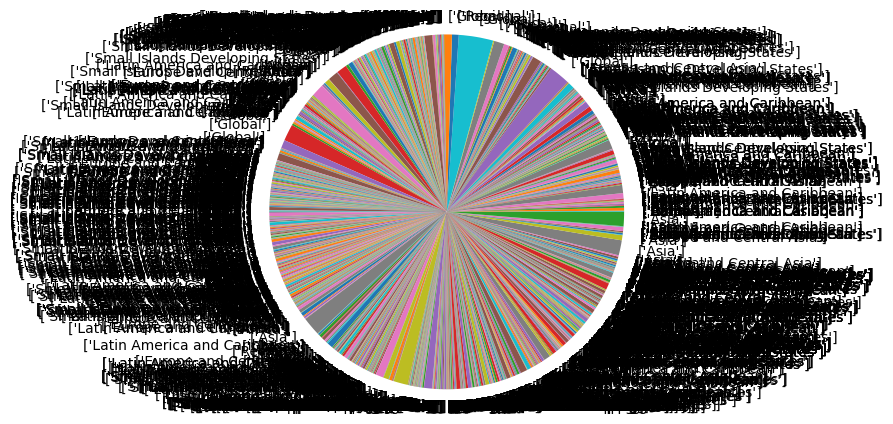

In [39]:
#categorical plot(pie chart)
x = project['Region']
y= project['Total Project Amount']
plt.pie(y, labels = x,radius = 1.2)

<BarContainer object of 2134 artists>

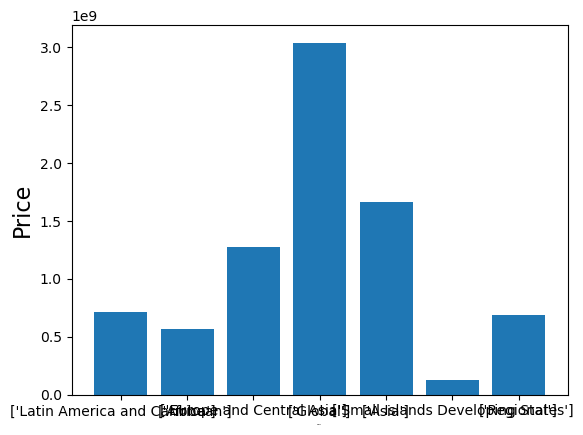

In [44]:
#bar chart 
plt.xlabel('Region', fontsize = 1)
plt.ylabel('Price', fontsize=16)
plt.bar(x,y)